Курсовой проект

Материалы к проекту (файлы):
train.csv
test.csv

Задание:
Используя данные из train.csv, построить
модель для предсказания цен на недвижимость (квартиры).
С помощью полученной модели предсказать
цены для квартир из файла test.csv.

Целевая переменная:
Price

Метрика:
R2 - коэффициент детерминации (sklearn.metrics.r2_score)

Сдача проекта:
1. Прислать в раздел Задания Урока 10 ("Вебинар. Консультация по итоговому проекту")
ссылку на программу в github (программа должна содержаться в файле Jupyter Notebook 
с расширением ipynb). (Pull request не нужен, только ссылка ведущая на сам скрипт).
2. Приложить файл с названием по образцу SShirkin_predictions.csv
с предсказанными ценами для квартир из test.csv (файл должен содержать два поля: Id, Price).
В файле с предсказаниями должна быть 5001 строка (шапка + 5000 предсказаний).

Сроки и условия сдачи:
Дедлайн: сдать проект нужно в течение 72 часов после начала Урока 10 ("Вебинар. Консультация по итоговому проекту").
Для успешной сдачи должны быть все предсказания (для 5000 квартир) и R2 должен быть больше 0.6.
При сдаче до дедлайна результат проекта может попасть в топ лучших результатов.
Повторная сдача и проверка результатов возможны только при условии предыдущей неуспешной сдачи.
Успешный проект нельзя пересдать в целях повышения результата.
Проекты, сданные после дедлайна или сданные повторно, не попадают в топ лучших результатов, но можно узнать результат.
В качестве итогового результата берется первый успешный результат, последующие успешные результаты не учитываются.

Примечание:
Все файлы csv должны содержать названия полей (header - то есть "шапку"),
разделитель - запятая. В файлах не должны содержаться индексы из датафрейма.

Рекомендации для файла с кодом (ipynb):
1. Файл должен содержать заголовки и комментарии
2. Повторяющиеся операции лучше оформлять в виде функций
3. Не делать вывод большого количества строк таблиц (5-10 достаточно)
4. По возможности добавлять графики, описывающие данные (около 3-5)
5. Добавлять только лучшую модель, то есть не включать в код все варианты решения проекта
6. Скрипт проекта должен отрабатывать от начала и до конца (от загрузки данных до выгрузки предсказаний)
7. Весь проект должен быть в одном скрипте (файл ipynb).
8. При использовании статистик (среднее, медиана и т.д.) в качестве признаков,
лучше считать их на трейне, и потом на валидационных и тестовых данных не считать 
статистики заново, а брать их с трейна. Если хватает знаний, можно использовать кросс-валидацию,
но для сдачи этого проекта достаточно разбить данные из train.csv на train и valid.
9. Проект должен полностью отрабатывать за разумное время (не больше 10 минут),
поэтому в финальный вариант лучше не включать GridSearch с перебором 
большого количества сочетаний параметров.
10. Допускается применение библиотек Python и моделей машинного обучения,
которые были в курсе Python для Data Science. Градиентный бустинг изучается
в последующих курсах, поэтому в этом проекте его применять не следует.
Самая сложная из допустимых моделей - RandomForestRegressor из sklearn.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

plt.style.use('fivethirtyeight')
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [3]:
# импортируем данные для обучения модели

data = pd.read_csv('C:/Users/Enns/Desktop/train.csv', index_col=0, encoding='utf-8')

**Описание датасета**

* **DistrictId** - Идентификационный номер района
* **Rooms** - Комнаты
* **Square** - Площадь
* **LifeSquare** - Жилая площадь
* **KitchenSquare** - Площадь кухни
* **Floor** - Этаж
* **HouseFloor** - Этажи в доме
* **HouseYear** - Год постройки дома
* **Ecology_1** - Экология_1
* **Ecology_2** - Экология_2
* **Ecology_3** - Экология_3
* **Social_1** - Социальный показатель 1
* **Social_2** - Социальный показатель 2
* **Social_3** - Социальный показатель 3
* **Healthcare_1** - Здравоохранение_1
* **Healthcare_2** - Здравоохранение_2
* **Shops_1** - Магазины 1
* **Shops_2** - Магазины 2
* **Price** - Цена

In [4]:
# выведем на экран первые 10 записей и убедимся в успешном импорте данных

data.head(10)

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
Id,,,,,,,,,,,,,,,,,,,
14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644
12915,59,3.0,80.384479,46.683720,12.0,5,17.0,2011,0.309479,B,B,35,7715,4,990.0,0,6,B,215898.447742
14549,154,2.0,62.254114,37.160377,7.0,3,5.0,1960,0.460556,B,B,20,4386,14,NaN,1,5,B,296021.204377
11993,74,2.0,80.312926,NaN,0.0,14,0.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,221244.156664
5172,1,2.0,64.511437,NaN,1.0,9,17.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,229102.795999


In [5]:
data.shape

(10000, 19)

### Обзор обучающего датасета и целевой переменной<a class="anchor" id="review"></a>

In [6]:
# выведем информацию о данных и проверим наличие пропусков

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 14038 to 6306
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DistrictId     10000 non-null  int64  
 1   Rooms          10000 non-null  float64
 2   Square         10000 non-null  float64
 3   LifeSquare     7887 non-null   float64
 4   KitchenSquare  10000 non-null  float64
 5   Floor          10000 non-null  int64  
 6   HouseFloor     10000 non-null  float64
 7   HouseYear      10000 non-null  int64  
 8   Ecology_1      10000 non-null  float64
 9   Ecology_2      10000 non-null  object 
 10  Ecology_3      10000 non-null  object 
 11  Social_1       10000 non-null  int64  
 12  Social_2       10000 non-null  int64  
 13  Social_3       10000 non-null  int64  
 14  Healthcare_1   5202 non-null   float64
 15  Helthcare_2    10000 non-null  int64  
 16  Shops_1        10000 non-null  int64  
 17  Shops_2        10000 non-null  object 
 18  Pri

**Обзор количественных признаков**

In [7]:
data.describe()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


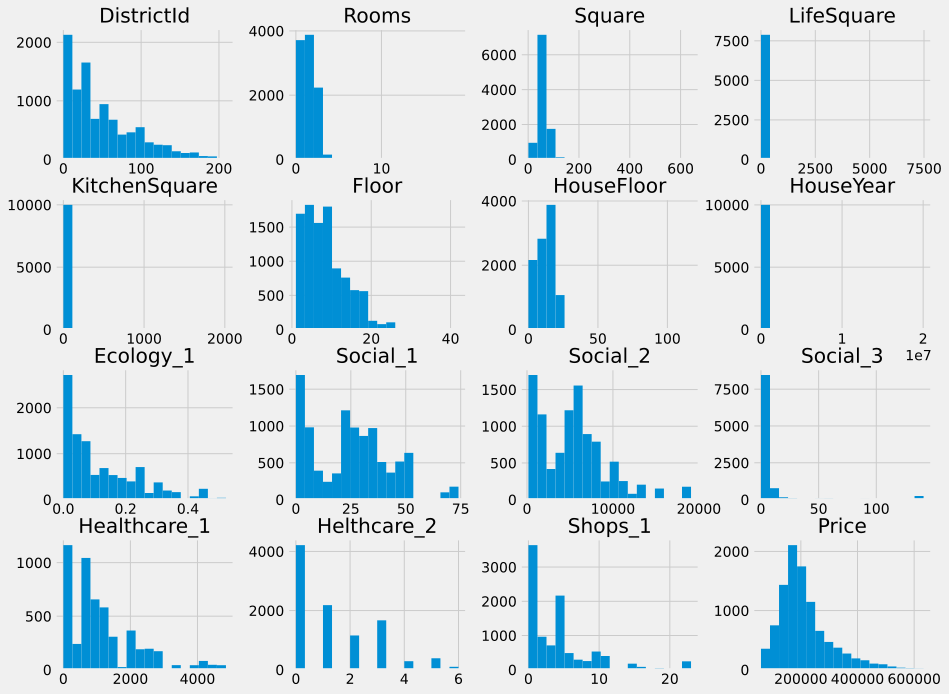

In [8]:
data.hist(bins = 18, figsize = (14, 11))
plt.show()

### Обработка выбросов<a class="anchor" id="outliers"></a>

In [9]:
# проведем минимальную чистку и предобработку данных
# построим несколько моделей и оценим качество на отложенной выборке по метрике R^2
# из построенных модель выберем baseline модель с наилучшим качеством
# заполним пропуски нулями

cleared_data = data.fillna(0)

In [10]:
X = cleared_data.drop(labels=['Price'], axis=1)
X = pd.get_dummies(data=X, columns=['DistrictId', 'Ecology_2', 'Ecology_3', 'Shops_2'], drop_first=True)
y = cleared_data['Price'].values

In [11]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

In [12]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

In [13]:
model_dict = {
   'lr': LinearRegression(),
#    'lasso': Lasso(random_state=42),
#    'ridge': Ridge(random_state=42),
#    'enet': ElasticNet(random_state=42),
   'knn': KNeighborsRegressor(),
   'dt': DecisionTreeRegressor(random_state=42),
   'rf': RandomForestRegressor(random_state=42)
}

score_list = []

for model in model_dict:
    model_dict[model].fit(X_train_scaled, y_train)
    y_pred_train = model_dict[model].predict(X_train_scaled)
    y_pred_valid = model_dict[model].predict(X_valid_scaled)
    score_train = r2_score(y_train, y_pred_train)
    score_valid = r2_score(y_valid, y_pred_valid)
    score_list.append((score_train, score_valid))

for model, scores in zip(model_dict.keys(), score_list):
    print(f'{model}: \n\ttrain: {np.round(scores[0], 4)} \n\tvalid: {np.round(scores[1], 4)}')

lr: 
	train: 0.6759 
	valid: 0.5829
knn: 
	train: 0.7495 
	valid: 0.5906
dt: 
	train: 1.0 
	valid: 0.5297
rf: 
	train: 0.9615 
	valid: 0.716


In [14]:
# с минимальной педобработкой данных лучший результат "из коробки" показала модель RandomForest
# baseline R^2 = 0.7006
# попробуем очистить и обработать имеющиеся данные
# продолжим работать с моделью RandomForest

In [17]:
# очистим данные

cleared_data = data[data['Rooms'] < 10]
cleared_data = cleared_data[cleared_data['Square'] < 250]
cleared_data = cleared_data[cleared_data['HouseFloor'] < 100]

In [18]:
# напишем функцию для предобработки данных

def preproc(df_input, dummy_features=None):
    
    df_output = df_input.copy()
        
    Square = dict(df_output.groupby('Rooms')['Square'].median())
    idx = (df_output['Square'] < 15) & (df_output['Rooms'] < 2)
    df_output.loc[idx, 'Square'] = df_output.loc[idx, 'Rooms'].apply(lambda x: Square[x])
    
    idx = (df_output['Square'] < 30) & (df_output['Rooms'] > 1)
    df_output.loc[idx, 'Square'] = df_output.loc[idx, 'Rooms'].apply(lambda x: Square[x])
    
    idx = (df_output['Square'] < df_output['LifeSquare'])
    df_output.loc[idx, 'Square'] = df_output.loc[idx, 'LifeSquare']

    LifeSquare = dict(df_output.groupby('Rooms')['LifeSquare'].median())
    idx = (df_output['LifeSquare'].isnull())
    df_output.loc[idx, 'LifeSquare'] = df_output.loc[idx, 'Rooms'].apply(lambda x: LifeSquare[x])

    idx = (df_output['Rooms'] < 1)
    df_output.loc[idx, 'KitchenSquare'] = 0.0
    
    KitchenSquare = dict(df_output.groupby('Rooms')['KitchenSquare'].median())
    idx = (df_output['Rooms'] > 0)
    df_output.loc[idx, 'KitchenSquare'] = df_output.loc[idx, 'Rooms'].apply(lambda x: KitchenSquare[x])
    
    idx = (df_output['HouseFloor'] < df_output['Floor'])
    df_output.loc[idx, 'HouseFloor'] = df_output.loc[idx, 'Floor']
    
    idx = (df_output['HouseYear'] >= 2019)
    df_output.loc[idx, 'HouseYear'] = 2019
   
    df_output['Healthcare_1'].fillna(df_output['Healthcare_1'].median(), inplace=True)
    
    df_output['Ecology_2'] = df_output['Ecology_2'].apply(lambda x: 1 if x == 'A' else 0)
    df_output['Ecology_3'] = df_output['Ecology_3'].apply(lambda x: 1 if x == 'A' else 0)
    df_output['Shops_2'] = df_output['Shops_2'].apply(lambda x: 1 if x == 'A' else 0)
    
    if dummy_features != None:
        df_output = pd.get_dummies(data=df_output, columns=dummy_features, drop_first=True)
    
    return df_output

In [19]:
# предобработаем данные для использования в модели

processed_data = preproc(cleared_data, dummy_features=None)

In [20]:
X = processed_data.drop(labels=['DistrictId', 'Price'], axis=1)
y = processed_data['Price'].values

In [21]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

In [22]:
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

In [23]:
# проведем настройку гиперпараметров модели с помощью RandomizedSearchCV

rf = RandomForestRegressor(random_state=42, n_jobs=-1)

random_grid = {
    'n_estimators': np.arange(200, 501, 20),
    'max_depth': np.arange(2, 51, 2),
    'max_features': [0.5, 0.6, 0.7, 0.8, 0.9],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]
}

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=random_grid,
    n_iter=50,
    scoring='r2',
    cv=10,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train_scaled, y_train)

print(random_search.best_score_)
print(random_search.best_params_)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


In [ ]:
# измерим качество подобранной модели на отложенной выборке

y_pred_train = random_search.best_estimator_.predict(X_train_scaled)
y_pred_valid = random_search.best_estimator_.predict(X_valid_scaled)

score_train = r2_score(y_train, y_pred_train)
score_valid = r2_score(y_valid, y_pred_valid)

print(f'train: {np.round(score_train, 4)}\nvalid: {np.round(score_valid, 4)}')

train: 0.9376
valid: 0.7169


In [ ]:
# обучим подобранную модель на всех тренировочных данных

scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X)

model = RandomForestRegressor(
    n_estimators=400,
    max_depth=26,
    max_features=0.5,
    min_samples_leaf=1,
    min_samples_split=5,
    random_state=42,
    n_jobs=-1
)

model.fit(X_scaled, y)

scores = cross_val_score(model, X_scaled, y, scoring='r2', cv=10, n_jobs=-1)

print(f'cv mean: {np.round(np.mean(scores), 4)}')
print(f'cv std:  {np.round(np.std(scores), 4)}')

cv mean: 0.7357
cv std:  0.0243


In [38]:
# загрузим неразмеченные данные для предсказания

new_data = pd.read_csv('C:/Users/Enns/Desktop/test.csv', index_col=0, encoding='utf-8')

In [39]:
# убедимся, что данные загрузились

new_data.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
Id,,,,,,,,,,,,,,,,,,
725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,B,B,11,2748,1,NaN,0,0,B
15856,74,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B
5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,B,B,30,7538,87,4702.0,5,5,B
15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,B,B,23,4583,3,NaN,3,3,B
14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A


In [40]:
# обработаем новые данные тем же спопосбом, что и данные на которых обучали модель

processed_new_data = preproc(new_data, dummy_features=None)

In [41]:
X_new = processed_new_data.drop(labels=['DistrictId'], axis=1)

In [42]:
# масштабируем новые данные подготовленным на тренировочных данных объектом класса MinMaxScaler

X_new_scaled = scaler.transform(X_new)

In [43]:
# предскажем цены квартир для новых наблюдений

y_pred_new = model.predict(X_new_scaled)

In [44]:
# запишем id объекта и предсказанную цену в датафрейм

predictions = pd.DataFrame({
    'Id': X_new.index,
    'Price': y_pred_new
})

In [45]:
predictions.head()

,Id,Price
0,725,159716.003524
1,15856,205133.085284
2,5480,272968.271945
3,15664,350647.142002
4,14275,136769.439246


In [ ]:
# сохраним предсказания в csv файл

predictions.to_csv('SShirkin_predictions.csv', sep=',', index=False, encoding='utf-8')